## Airbnb Listings

## 1) Import Libraries

In [1]:
import pandas as pd
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

## 2) Load the Data

In [2]:
df = pd.read_csv("airbnb_listings.csv")
pd.set_option('display.max_columns', None)
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29178,-6.257920,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",$70.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29209,-6.256240,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",$67.00,3,21,3,3,21,21,3.0,21.0,NaN,t,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,within an hour,100%,95%,f,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,t,"Dublin, Ireland",Dublin City,NaN,53.39027,-6.235470,Private room in home,Private room,1,NaN,2 shared baths,1.0,1.0,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",$45.00,2,21,1,2,21,21,2.0,21.0,NaN,t,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4

In [3]:
pd.set_option('display.max_rows', None)
print(df.dtypes)
pd.reset_option('display.max_rows')

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [4]:
pd.set_option('display.max_rows', None)
total_null = df.isna().mean() * 100
print(total_null)
pd.reset_option('display.max_rows')

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.048639
neighborhood_overview                            44.567803
picture_url                                       0.000000
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.000000
host_since                                        0.000000
host_location                                    17.631509
host_about                                       53.000264
host_response_time                               48.030663
host_response_rate                               48.0306

## 3) Data Cleaning

I started by excluding specific columns that do not contribute any value to the analysis. These columns either consist entirely of null values or contain errors in the dataset, rendering them irrelevant for trend analysis. Furthermore, certain information within these columns lacks correlation with other variables.

In [5]:
columns_to_drop = ['host_about', 'host_thumbnail_url','host_picture_url','host_verifications', 'neighbourhood', 'neighbourhood_cleansed','neighbourhood_group_cleansed',
                   'bathrooms','amenities','license','name','description','neighborhood_overview','picture_url','host_url','listing_url','scrape_id','calendar_updated',
                  'last_scraped','source','calendar_last_scraped']

df = df.drop(columns=columns_to_drop)

df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,$70.00,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,$67.00,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,100%,95%,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,$45.00,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,92%,87%,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,$80.00,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,100%,91%,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,$251.00,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",NaN,NaN,NaN,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$200.00,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,100%,23%,f,NaN,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,$48.00,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,100%,25%,f,NaN,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,$64.00,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",NaN,NaN,NaN,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$240.00,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


Next, I convert the variables identified as objects into the datetime format as appropriate.

In [6]:
columns_date_convert = ['host_since', 'first_review', 'last_review']
df[columns_date_convert] = df[columns_date_convert].apply(pd.to_datetime)
df



,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,$70.00,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,$67.00,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,100%,95%,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,$45.00,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,92%,87%,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,$80.00,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,100%,91%,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,$251.00,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",NaN,NaN,NaN,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$200.00,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,100%,23%,f,NaN,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,$48.00,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,100%,25%,f,NaN,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,$64.00,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",NaN,NaN,NaN,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$240.00,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


For numerical values containing null values, I replace those null values with zeros.

In [7]:
columns_zero = ['host_response_rate','host_acceptance_rate','bedrooms','beds','review_scores_rating','review_scores_accuracy',
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                'reviews_per_month']

df[columns_zero] = df[columns_zero].fillna(0)

df


,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,$70.00,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,100%,99%,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,$67.00,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,100%,95%,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,$45.00,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,92%,87%,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,$80.00,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,100%,91%,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,$251.00,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",NaN,0,0,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$200.00,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,100%,23%,f,NaN,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,$48.00,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,100%,25%,f,NaN,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,$64.00,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",NaN,0,0,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$240.00,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00


The columns 'host_response_rate' and 'host_acceptance_rate' were initially classified as objects due to the presence of the '%' symbol. I removed the symbol and converted the values in these columns to the float data type.

In [8]:
columns_percentage = ['host_response_rate', 'host_acceptance_rate']

df[columns_percentage] = df[columns_percentage].replace('%', '', regex=True).astype(float) / 100.0

df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,$70.00,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,$67.00,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,$45.00,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,$80.00,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,$251.00,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",NaN,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$200.00,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,NaN,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,$48.00,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,NaN,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,$64.00,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",NaN,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,$240.00,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00


The same with the column "price" to remove the "$" symbol.

In [9]:
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",NaN,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,NaN,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,NaN,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",NaN,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,240.0,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00


For categorical variables, I have designated null values as 'Not Specified'.

In [10]:
columns_to_fill = ['host_location', 'host_response_time', 'host_neighbourhood', 'bathrooms_text']
df[columns_to_fill] = df[columns_to_fill].fillna('Not Specified')
df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,240.0,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00


At this stage, I generated two columns by splitting the values using a comma. The first value preceding the comma has been designated as 'City,' while the value following the comma has been assigned to 'Country.

In [11]:
split_location = df['host_location'].str.split(', ', n=1, expand=True)
df['city'] = split_location[0]
df['country'] = split_location[1]

df['country'] = df.apply(lambda row: row['host_location'] if pd.isnull(row['country']) else row['country'], axis=1)

df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48,Ireland,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00,County Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private 

Some entries in the 'City' column had the word 'County' at the beginning of the sentence, and I removed these values from the column. Additionally, if the 'host_location' column contains the value 'Not Specified,' it is mirrored in the 'Country' column.

In [12]:
df['city'] = df['city'].replace('County', '', regex=True)
df['city'] = df['city'].fillna('Not Specified')
df['country'] = df.apply(lambda row: 'Not Specified' if row['host_location'] == 'Not Specified' else row['country'], axis=1)

df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48,Ireland,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,

To prevent duplicate values in the 'City' column, I implemented a condition: if the value in the 'City' column matches the one in the 'Country' column, then the value is set to 'Not Specified'. And then drop the column "host_location" because it won't be used in the next steps.

In [13]:
df['city'] = df.apply(lambda row: 'Not Specified' if row['city'] == row['country'] else row['city'], axis=1)
df

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,"Dublin, Ireland",within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,"Dublin, Ireland",within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,"Dublin, Ireland",within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,Ireland,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,"Dublin, Ireland",Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,"County Dublin, Ireland",within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,"Dublin, Ireland",within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,"Dublin, Ireland",Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private r

In [14]:
df = df.drop(columns='host_location')
df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,240.0,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00,Dublin,Ireland


For the 'host_response_time' column, I filled in the mode corresponding to the 'host_id' for values equal to zero.

In [15]:
df['host_response_time'] = df.groupby('host_id')['host_response_time'].transform(lambda x: x.replace(0, x.mode().iloc[0]))
df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,2,0,2,0,0.00,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,2,0,2,0,0.00,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,Not Specified,0.00,0.00,f,Donaghmede,1,2,t,f,53.40717,-6.158870,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,240.0,1,365,1,1,365,365,1.0,365.0,t,30,60,90,353,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00,Dublin,Ireland


In [16]:
result = df.query('host_response_time == "Not Specified"')

result

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
14,386860,1935798,Sinead,2012-03-16,Not Specified,0.0,0.0,f,The Liberties,2,2,t,t,53.337900,-6.275170,Entire home,Entire home/apt,4,1 bath,2.0,2.0,164.0,1,30,1,2,30,30,1.6,30.0,t,0,0,0,0,92,0,0,2012-08-13,2019-12-13,4.67,4.77,4.52,4.91,4.83,4.77,4.56,f,2,2,0,0,0.75,Dublin,Ireland
15,393631,1968168,Mick & Dee,2012-03-19,Not Specified,0.0,0.0,f,North Strand,1,3,t,t,53.357640,-6.241710,Entire home,Entire home/apt,6,2 baths,3.0,3.0,180.0,3,1125,3,3,1125,1125,3.0,1125.0,t,0,0,0,0,72,0,0,2012-08-07,2017-03-19,4.87,4.88,4.86,4.93,4.91,4.24,4.65,f,1,1,0,0,0.59,Dublin,Ireland
27,575339,1689834,Moris,2012-02-02,Not Specified,0.0,0.0,f,Not Specified,1,1,t,t,53.343910,-6.238450,Private room in rental unit,Private room,2,1 bath,1.0,2.0,50.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Istanbul,Turkey
30,610233,687547,Kate,2011-06-10,Not Specified,0.0,0.0,f,Not Specified,1,2,t,t,53.346160,-6.272280,Entire home,Entire home/apt,4,2.5 baths,2.0,2.0,150.0,2,1125,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,61,0,0,2012-08-22,2019-03-23,4.82,4.89,4.66,4.89,4.89,4.97,4.70,f,1,1,0,0,0.50,Not Specified,Ireland
31,637185,3177950,Justin,2012-08-06,Not Specified,0.0,0.0,f,Smithfield,1,1,t,t,53.346750,-6.275520,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,119.0,7,60,7,7,60,60,7.0,60.0,t,0,0,0,0,158,0,0,2012-10-22,2018-10-13,4.50,4.60,4.43,4.63,4.55,4.72,4.55,f,1,1,0,0,1.31,Not Specified,Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7549,711809489998155758,478756048,Bennett,2022-09-08,Not Specified,0.0,1.0,f,Not Specified,1,1,f,f,53.339972,-6.264323,Entire rental unit,Entire home/apt,6,1 bath,3.0,3.0,210.0,3,365,3,3,365,365,3.0,365.0,t,9,12,12,169,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,1,0,0,0.00,Not Specified,Not Specified
7552,712056128539274270,478789356,Anne,2022-09-09,Not Specified,0.0,0.0,f,Dalkey,1,1,f,f,53.275210,-6.098450,Private room in home,Private room,2,1 private bath,1.0,1.0,177.0,2,14,2,2,14,14,2.0,14.0,t,15,15,15,19,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00,Not Specified,Not Specified
7560,712780155240462339,85823787,Ciara,2016-07-25,Not Specified,0.0,0.0,f,Ballyowen,1,1,t,t,53.353940,-6.416930,Private room in home,Private room,1,1 shared bath,1.0,1.0,35.0,2,14,2,2,1125,1125,2.0,1125.0,t,8,21,22,82,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,t,1,0,1,0,0.00,Dublin,Ireland
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.0,0.0,f,Kinsealy,1,1,t,t,53.424160,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,1,0,1,0,0.00,Dublin,Ireland


For columns where zero values are present, I attempted to fill them with the mean based on the 'host_id'.

In [17]:
mean_columns = ['host_acceptance_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
                
df[mean_columns] = df.groupby('host_id')[mean_columns].transform(lambda x: x.replace(0, x.mean()))
df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.780000,4.830000,4.740000,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.790000,4.860000,4.740000,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.740000,4.770000,4.710000,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.840000,4.880000,4.850000,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.630000,4.890000,4.690000,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,f,1,0,1,0,0.000000,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,2.345000,2.405000,2.400000,2.460000,2.445000,2.385000,2.310000,f,2,0,2,0,1.135000,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,t,2,0,2,0,0.030000,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,Not Specified,0

In [18]:
result2 = df.query('reviews_per_month == 0')

result2

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
27,575339,1689834,Moris,2012-02-02,Not Specified,0.0,0.0,f,Not Specified,1,1,t,t,53.34391,-6.23845,Private room in rental unit,Private room,2,1 bath,1.0,2.0,50.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Istanbul,Turkey
81,1771007,9302663,Craig & Becks,2013-10-08,Not Specified,0.0,0.0,f,Not Specified,1,2,t,t,53.21096,-6.12187,Private room in home,Private room,2,1.5 baths,1.0,1.0,50.0,1,2,1,1,2,2,1.0,2.0,t,0,0,0,0,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Bray,Ireland
82,1789253,8768901,Carolina,2013-09-11,Not Specified,0.0,0.0,f,Not Specified,1,1,t,t,53.34438,-6.27426,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,170.0,2,1125,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,1,0,0,0.0,Madrid,Spain
97,2202076,503635,Rory,2011-04-12,Not Specified,0.0,0.0,f,Not Specified,1,1,t,t,53.26852,-6.11418,Entire rental unit,Entire home/apt,6,2 baths,2.0,3.0,100.0,3,7,3,3,7,7,3.0,7.0,t,0,0,0,0,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,1,0,0,0.0,Not Specified,Ireland
98,2215722,11294447,Jim,2014-01-14,within a few hours,1.0,0.0,f,Clontarf,1,3,t,t,53.37106,-6.19743,Private room in home,Private room,2,1 shared bath,1.0,3.0,120.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Dublin,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,712248178057753247,42179044,Ger,2015-08-22,within an hour,1.0,1.0,f,Loughsallagh,1,1,t,t,53.40843,-6.44540,Private room in townhouse,Private room,2,1.5 baths,1.0,1.0,89.0,1,7,1,1,7,7,1.0,7.0,t,17,36,58,317,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Dublin,Ireland
7558,712397882879854413,408414644,Giovana,2021-06-21,within an hour,1.0,1.0,f,Aviação,2,2,t,t,53.36024,-6.26231,Private room in bed and breakfast,Private room,1,1 shared bath,1.0,1.0,44.0,35,50,35,35,50,50,35.0,50.0,t,28,58,88,88,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Not Specified,Not Specified
7560,712780155240462339,85823787,Ciara,2016-07-25,Not Specified,0.0,0.0,f,Ballyowen,1,1,t,t,53.35394,-6.41693,Private room in home,Private room,1,1 shared bath,1.0,1.0,35.0,2,14,2,2,1125,1125,2.0,1125.0,t,8,21,22,82,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t,1,0,1,0,0.0,Dublin,Ireland
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.0,0.0,f,Kinsealy,1,1,t,t,53.42416,-6.16939,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,1,0,1,0,0.0,Dublin,Ireland


I attempted the same approach for the numerical variables 'bedrooms' and 'bed,' as well as the categorical variable 'bathrooms_text,' this time grouping by the 'room_type' column.

In [19]:
import numpy as np

mode_fill_columns_num = ["bedrooms", "beds"]


df[mode_fill_columns_num] = df[mode_fill_columns_num].replace(0, np.nan)

df["bathrooms_text"] = df["bathrooms_text"].replace("Not Specified", np.nan)

for col in mode_fill_columns_num + ["bathrooms_text"]:
    mode_fill_values = df.groupby("room_type")[col].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df[col] = df[col].fillna(df["room_type"].map(mode_fill_values))

df[mode_fill_columns_num] = df[mode_fill_columns_num].fillna(0)


df["bathrooms_text"] = df["bathrooms_text"].fillna("Not Specified")


In [20]:
result3 = df.query('bathrooms_text == "Not Specified"')

result3

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country


In [21]:
result4 = df.query('beds == 0')

result4

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country


In [22]:
df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.780000,4.830000,4.740000,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.790000,4.860000,4.740000,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.740000,4.770000,4.710000,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.840000,4.880000,4.850000,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.630000,4.890000,4.690000,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,NaT,NaT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,f,1,0,1,0,0.000000,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,NaT,NaT,2.345000,2.405000,2.400000,2.460000,2.445000,2.385000,2.310000,f,2,0,2,0,1.135000,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,NaT,NaT,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,t,2,0,2,0,0.030000,Dublin,Ireland
7564,712966369602352444,256847071,Sorcha,2019-04-19,Not Specified,0

In [23]:
pd.set_option('display.max_rows', None)
total_null = df.isna().mean() * 100
print(total_null)
pd.reset_option('display.max_rows')

id                                               0.000000
host_id                                          0.000000
host_name                                        0.000000
host_since                                       0.000000
host_response_time                               0.000000
host_response_rate                               0.000000
host_acceptance_rate                             0.000000
host_is_superhost                                0.000000
host_neighbourhood                               0.000000
host_listings_count                              0.000000
host_total_listings_count                        0.000000
host_has_profile_pic                             0.000000
host_identity_verified                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates  

For the columns 'first_review' and 'last_review,' I opted to fill the null spaces with today's date.

In [24]:
from datetime import datetime
date_columns = ["first_review","last_review"]
df[date_columns] = df[date_columns].fillna(pd.to_datetime(datetime.today().strftime('%Y-%m-%d')))

df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.780000,4.830000,4.740000,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000,Dublin,Ireland
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.790000,4.860000,4.740000,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000,Dublin,Ireland
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.740000,4.770000,4.710000,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000,Dublin,Ireland
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.840000,4.880000,4.850000,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000,Dublin,Ireland
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.630000,4.890000,4.690000,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000,Not Specified,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,2024-01-12,2024-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,f,1,0,1,0,0.000000,Dublin,Ireland
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,2024-01-12,2024-01-12,2.345000,2.405000,2.400000,2.460000,2.445000,2.385000,2.310000,f,2,0,2,0,1.135000,Dublin,Ireland
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,2024-01-12,2024-01-12,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,t,2,0,2,0,0.030000,Dublin,Ireland
7564,712966369602352444,2

At this point, I checked to leave the data without null values.

In [25]:
pd.set_option('display.max_rows', None)
total_null = df.isna().mean() * 100
print(total_null)
pd.reset_option('display.max_rows')

id                                              0.0
host_id                                         0.0
host_name                                       0.0
host_since                                      0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_total_listings_count                       0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
latitude                                        0.0
longitude                                       0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms    

I used the column 'review_scores_value' to define a new column that is going to determine the rating scale between "Vert Dissatisfied" and "Very Satisfied".

In [26]:
conditions = [
    (df['review_scores_value'] < 2),
    ((df['review_scores_value'] >= 2) & (df['review_scores_value'] < 3)),
    ((df['review_scores_value'] >= 3) & (df['review_scores_value'] < 4)),
    ((df['review_scores_value'] >= 4) & (df['review_scores_value'] < 5)),
    (df['review_scores_value'] >= 5)
]

choices = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Regular",
    "Satisfied",
    "Very Satisfied"
]

df["Rating_Scale"] = np.select(conditions, choices, default="No Identified")

df

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country,Rating_Scale
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.780000,4.830000,4.740000,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000,Dublin,Ireland,Satisfied
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.790000,4.860000,4.740000,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000,Dublin,Ireland,Satisfied
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.740000,4.770000,4.710000,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000,Dublin,Ireland,Satisfied
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.840000,4.880000,4.850000,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000,Dublin,Ireland,Satisfied
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.630000,4.890000,4.690000,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000,Not Specified,Ireland,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,2024-01-12,2024-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,f,1,0,1,0,0.000000,Dublin,Ireland,Very Dissatisfied
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,2024-01-12,2024-01-12,2.345000,2.405000,2.400000,2.460000,2.445000,2.385000,2.310000,f,2,0,2,0,1.135000,Dublin,Ireland,Dissatisfied
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5 shared baths,2.0,2.0,64.0,2,90,2,2,1125,1125,2.0,1125.0,t,12,32,52,306,0,0,0,2024-01-12,2024-01-12,2.500000,2.500000,2.5000

The same concept for the column "Price" between prices less than 100 until more than 2000.

In [27]:
conditions2 = [
    (df['price'] < 100),
    ((df['price'] >= 100) & (df['price'] < 500)),
    ((df['price'] >= 500) & (df['price'] < 1000)),
    ((df['price'] >= 1000) & (df['price'] < 1500)),
    ((df['price'] >= 1500) & (df['price'] < 2000)),
    (df['price'] >= 2000)
]

choices2 = [
    "Less than 100",
    "Between 100 to 499",
    "Between 500 to 999",
    "Between 1000 to 1499",
    "Between 1500 to 2000",
    "More than 2000"
]

df["Scale_Price"] = np.select(conditions2, choices2, default="0")

df



,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,country,Rating_Scale,Scale_Price
0,44077,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29178,-6.257920,Private room in bungalow,Private room,2,1.5 shared baths,1.0,2.0,70.0,3,1125,3,3,1125,1125,3.0,1125.0,t,2,11,18,104,258,31,7,2011-03-20,2022-09-09,4.780000,4.830000,4.740000,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000,Dublin,Ireland,Satisfied,Less than 100
1,85156,193005,Teresa,2010-08-06,within an hour,1.00,0.99,t,Churchtown,2,2,t,t,53.29209,-6.256240,Private room in bungalow,Private room,2,1.5 shared baths,1.0,1.0,67.0,3,21,3,3,21,21,3.0,21.0,t,3,9,21,110,210,28,4,2011-05-24,2022-09-11,4.790000,4.860000,4.740000,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000,Dublin,Ireland,Satisfied,Less than 100
2,159889,766611,Margaret,2011-07-01,within an hour,1.00,0.95,f,Beaumont,3,4,t,t,53.39027,-6.235470,Private room in home,Private room,1,2 shared baths,1.0,1.0,45.0,2,21,1,2,21,21,2.0,21.0,t,1,16,36,290,355,44,6,2012-03-20,2022-09-01,4.740000,4.770000,4.710000,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000,Dublin,Ireland,Satisfied,Less than 100
3,162809,777681,Robbie,2011-07-04,within an hour,0.92,0.87,t,Blackrock,2,2,t,t,53.28326,-6.191880,Private room in townhouse,Private room,6,1.5 shared baths,2.0,4.0,80.0,1,12,1,1,12,12,1.0,12.0,t,2,2,2,74,326,41,1,2015-06-01,2022-08-31,4.840000,4.880000,4.850000,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000,Dublin,Ireland,Satisfied,Less than 100
4,165828,790601,Grainne,2011-07-07,within an hour,1.00,0.91,f,Kilmainham,5,5,t,t,53.33744,-6.323630,Entire rental unit,Entire home/apt,5,1 bath,1.0,3.0,251.0,3,365,3,3,365,365,3.0,365.0,t,1,4,21,31,64,17,0,2011-10-25,2022-06-28,4.630000,4.890000,4.690000,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000,Not Specified,Ireland,Satisfied,Between 100 to 499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,38652370,Gillian,2015-07-16,Not Specified,0.00,0.00,f,Kinsealy,1,1,t,t,53.42416,-6.169390,Private room in home,Private room,2,1.5 shared baths,1.0,1.0,200.0,1,365,1,1,365,365,1.0,365.0,t,2,2,7,273,0,0,0,2024-01-12,2024-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,f,1,0,1,0,0.000000,Dublin,Ireland,Very Dissatisfied,Between 100 to 499
7562,712914322433199115,89156390,Teresa,2016-08-10,within an hour,1.00,0.23,f,Not Specified,2,2,t,f,53.45739,-6.224050,Private room in casa particular,Private room,1,1 shared bath,1.0,1.0,48.0,1,2,1,1,2,2,1.0,2.0,t,27,56,86,86,0,0,0,2024-01-12,2024-01-12,2.345000,2.405000,2.400000,2.460000,2.445000,2.385000,2.310000,f,2,0,2,0,1.135000,Dublin,Ireland,Dissatisfied,Less than 100
7563,712914393022526732,128213034,Patricia,2017-04-30,within a few hours,1.00,0.25,f,Not Specified,2,2,t,t,53.24707,-6.142810,Private room in home,Private room,2,1.5

## 4) HeatMap Graphic

The HeatMap helped me to determinate if there is correlation between the numerical variables.

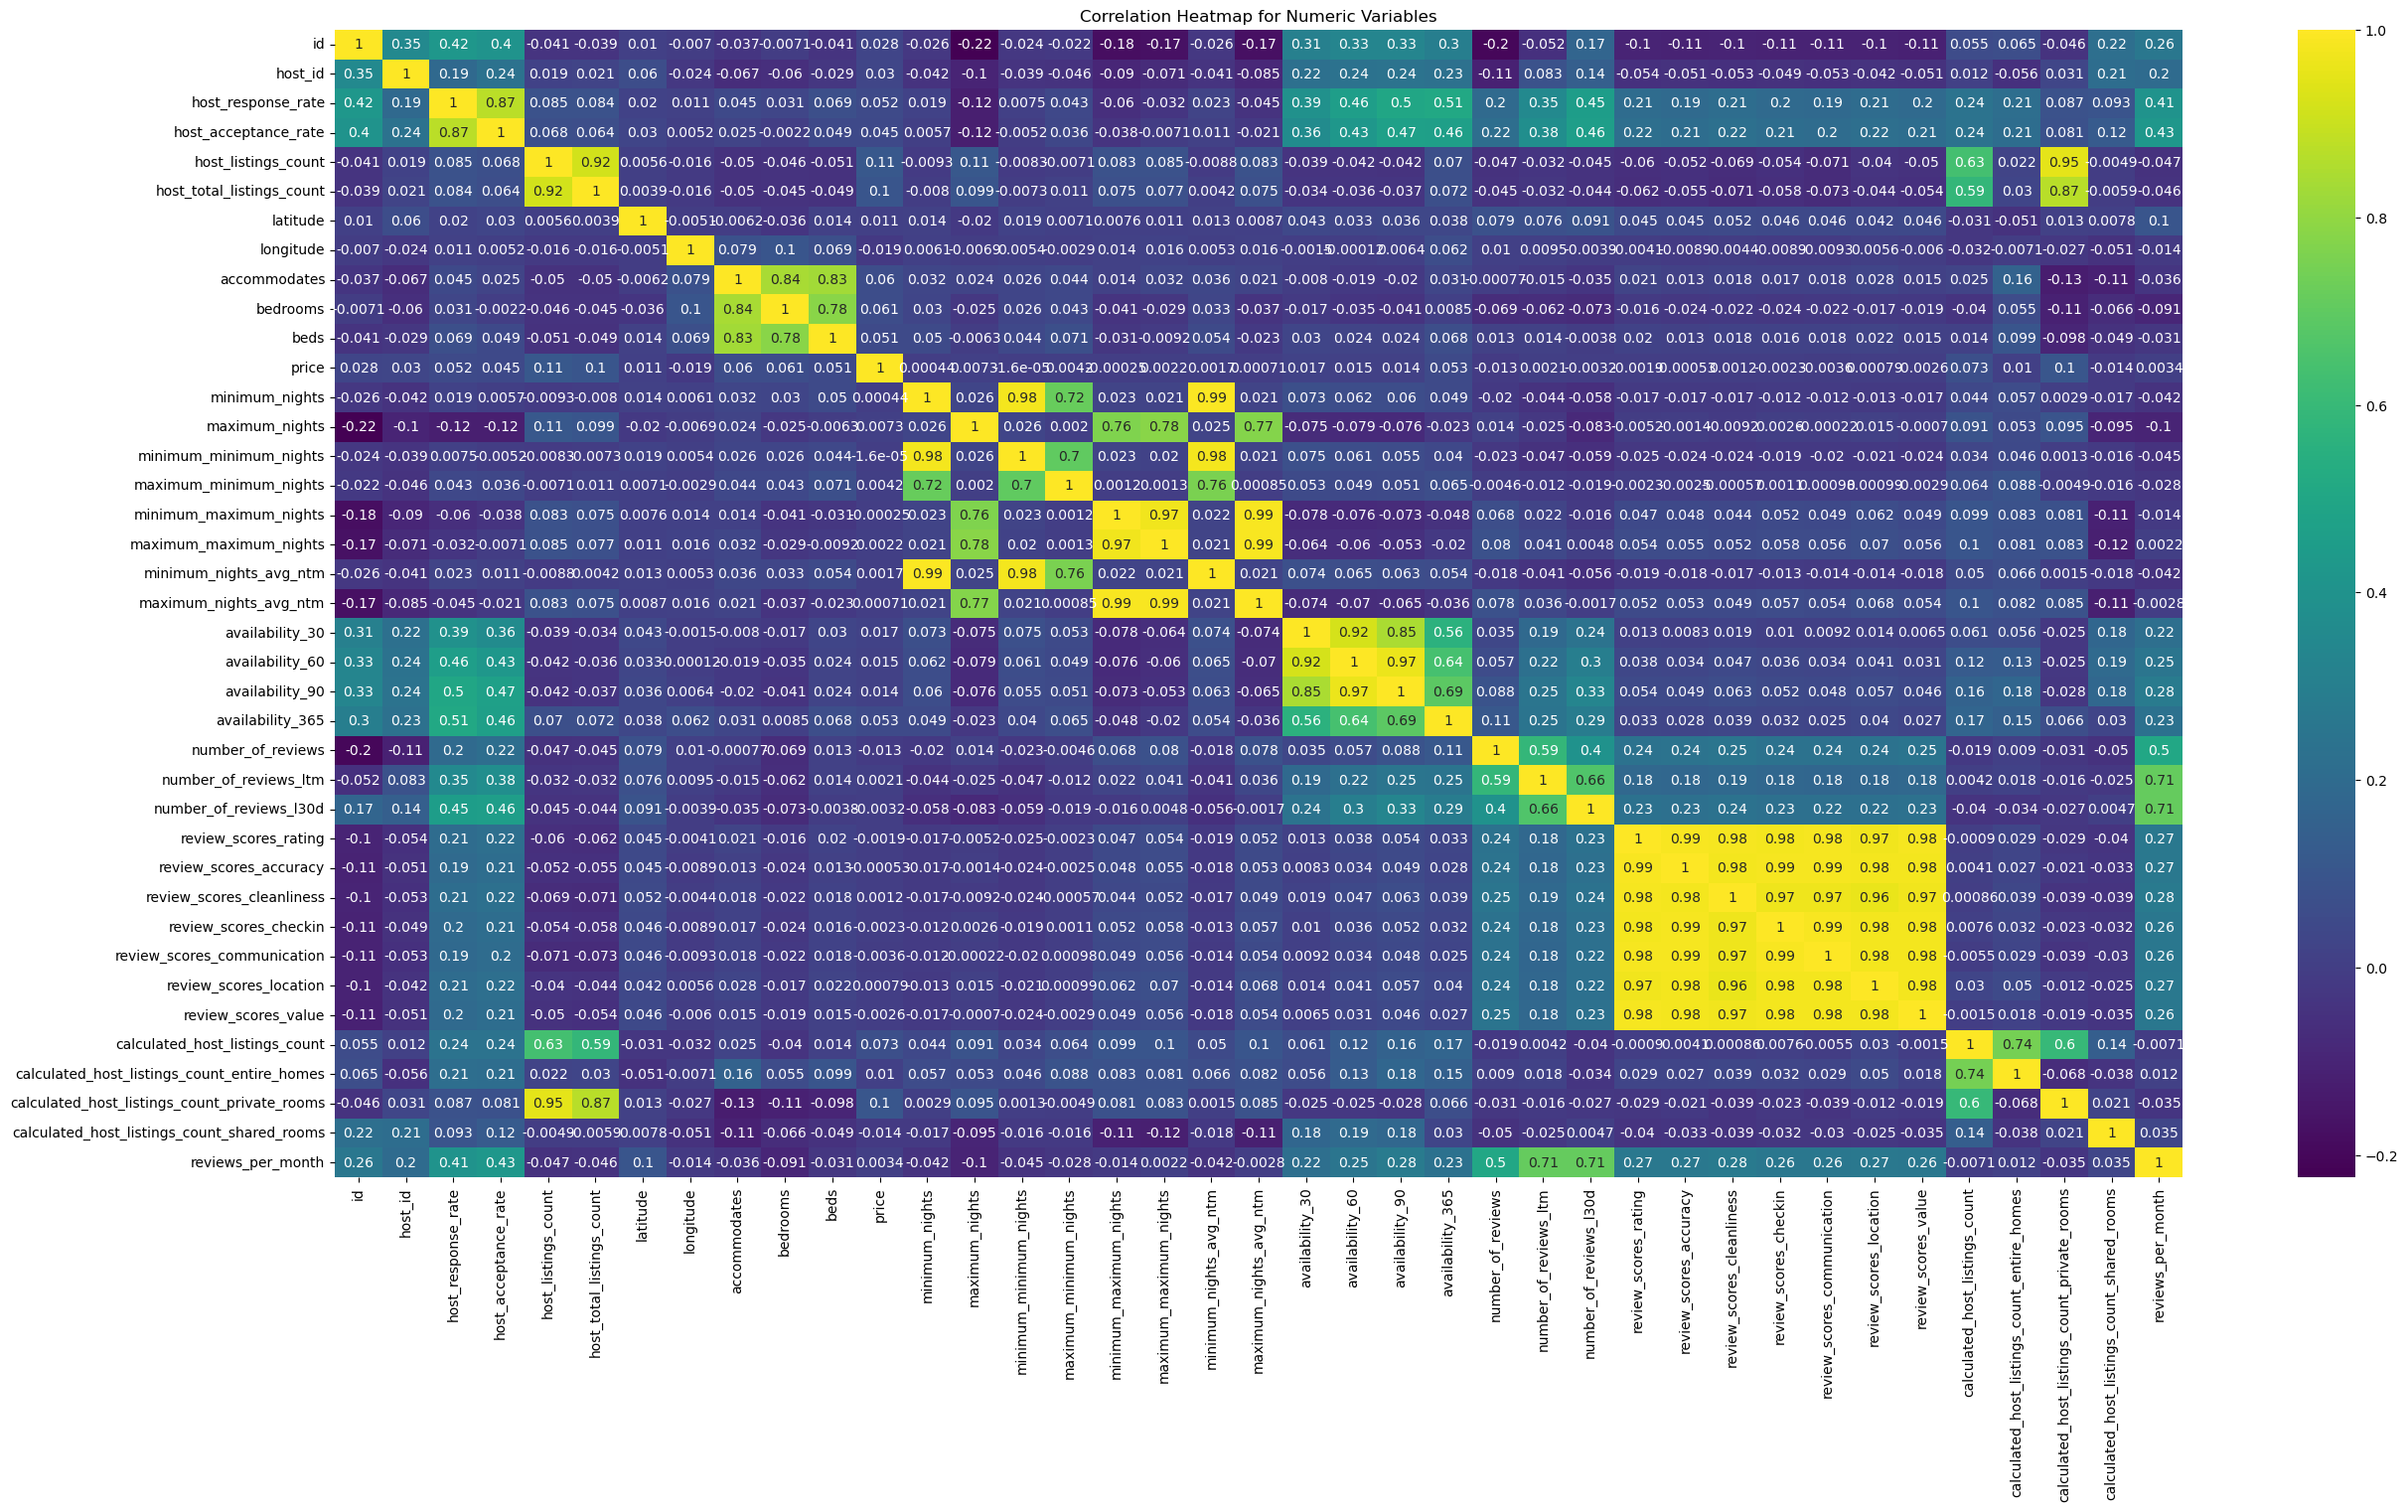

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64','int'])

# Creating the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()

## 5) Trends

### Rating_Scale vs Price

C:\Users\eduar\AppData\Local\Temp\ipykernel_20700\924149134.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Rating_Scale", y="price", data=df, palette="viridis", ci=None)


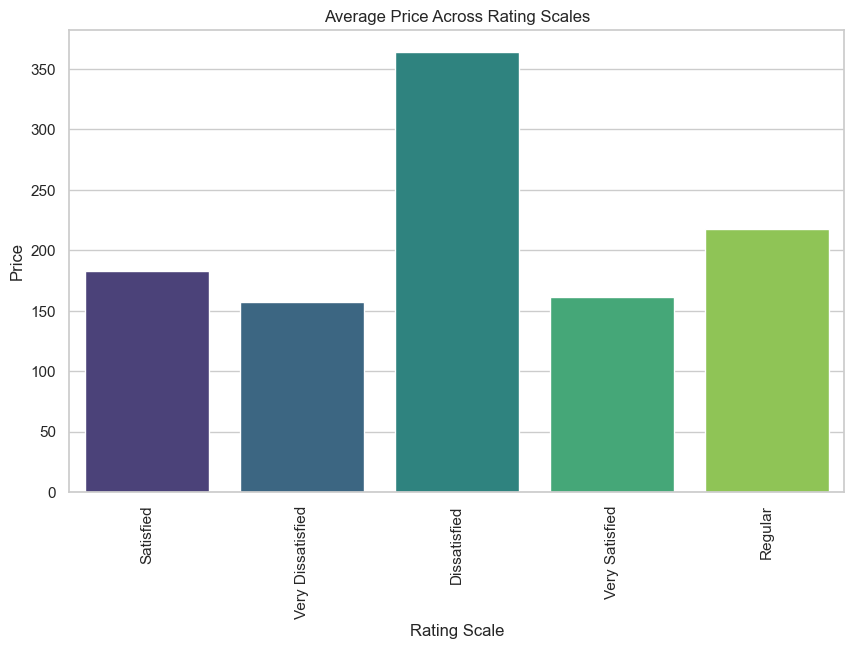

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

grouped_data = df.groupby("Rating_Scale")["price"].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Rating_Scale", y="price", data=df, palette="viridis", ci=None)


plt.xticks(rotation=90)
plt.xlabel("Rating Scale")
plt.ylabel("Price")
plt.title("Average Price Across Rating Scales")

plt.show()


In this graphic, it is evident that as the accommodation becomes more expensive, the dissatisfaction rate increases, and as the accommodation becomes cheaper, the customer experience tends to be very dissatisfactory. This could be attributed to the fact that more expensive accommodations may raise customer expectations, prompting them to focus on every small detail of the place. Conversely, with cheaper accommodations, it may be due to a lack of investment in improving their rooms, potentially resulting in subpar conditions.

### Scale Price

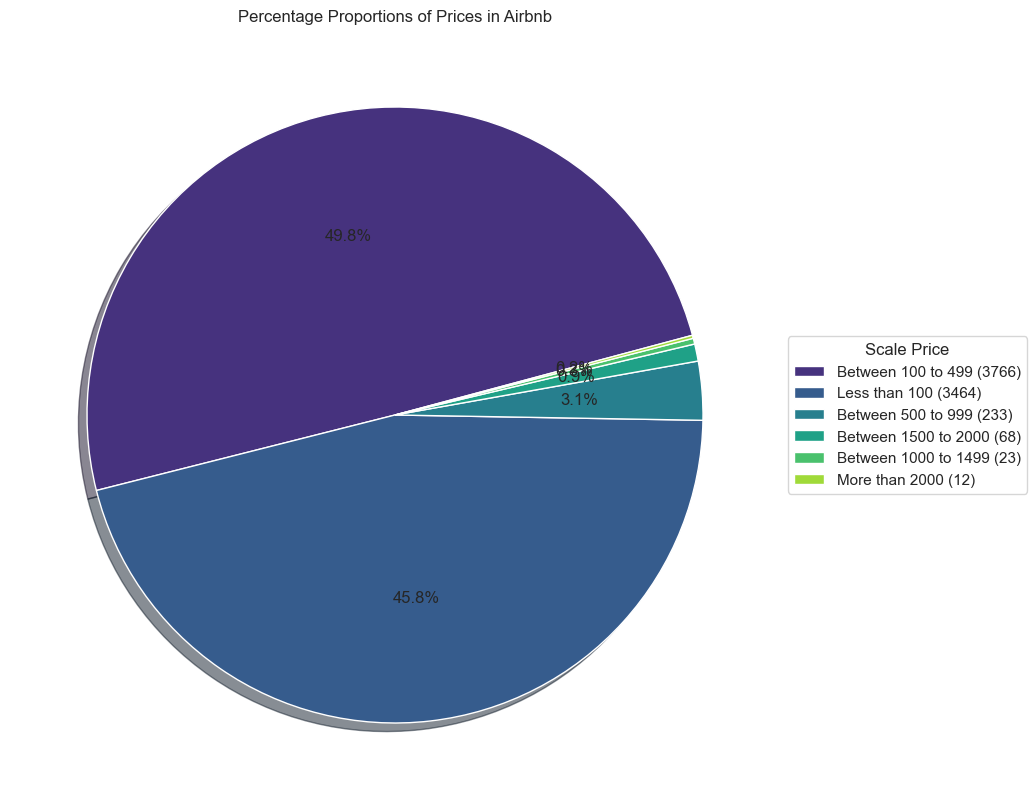

In [30]:
counts = df["Scale_Price"].value_counts()

colors = sns.color_palette("viridis", len(counts))
plt.figure(figsize=(10, 10))  # Set figure size

patches, texts, autotexts = plt.pie(counts, colors=colors, autopct="%1.1f%%", startangle=15, shadow=True)

legend_labels = [f"{label} ({count})" for label, count in zip(counts.index, counts)]
plt.legend(patches, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Scale Price", title_fontsize="12")
plt.title("Percentage Proportions of Prices in Airbnb", loc="center")


plt.show()

Approximately 49.9% of Airbnb listings are apartments priced between 100 and 499 dollars. The second-highest percentage corresponds to apartments priced under 100 dollars, while the smallest percentage corresponds to those priced above 2000 dollars. This observation may be attributed to the exclusivity of these high-priced listings, making them less accessible for regular renters.

### host_response_time vs review_scores_communication

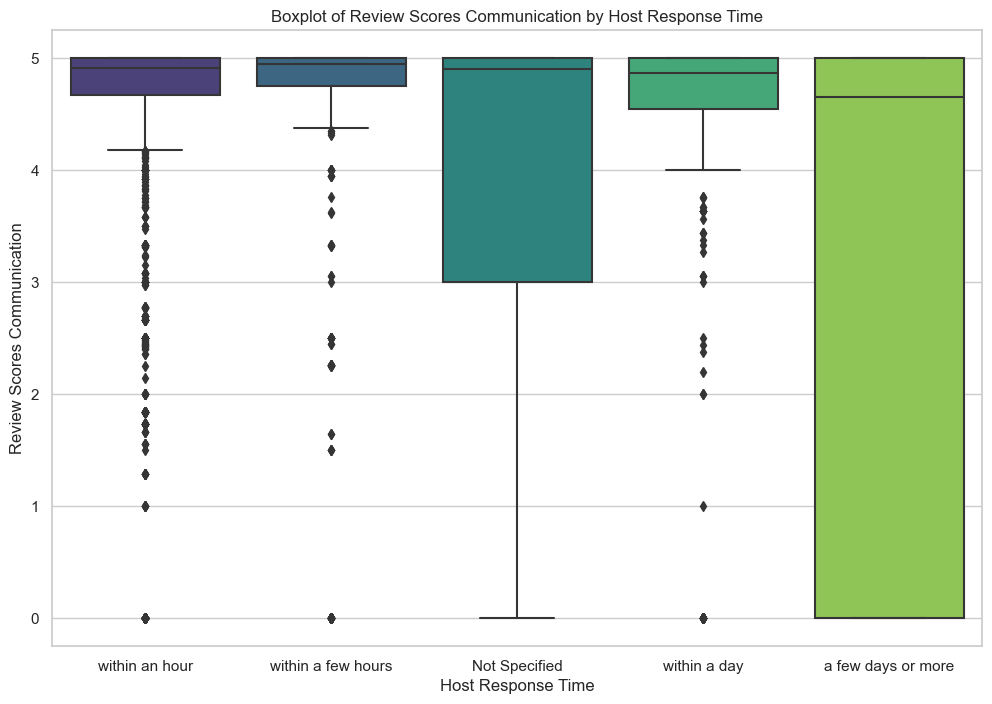

In [31]:

sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.boxplot(x="host_response_time", y="review_scores_communication", data=df, palette="viridis")


plt.xlabel("Host Response Time")
plt.ylabel("Review Scores Communication")
plt.title("Boxplot of Review Scores Communication by Host Response Time")


plt.show()

The boxplot graphic illustrates that, generally, when the host responds to the customer in a shorter amount of time, there is a higher likelihood of receiving a positive review score for communication. Specifically, the highest scores are associated with response times categorized as "within an hour" and "within a few hours." On the other hand, instances where the response time is labeled as "A few days or more" tend to have a higher probability of receiving a score closer to zero.

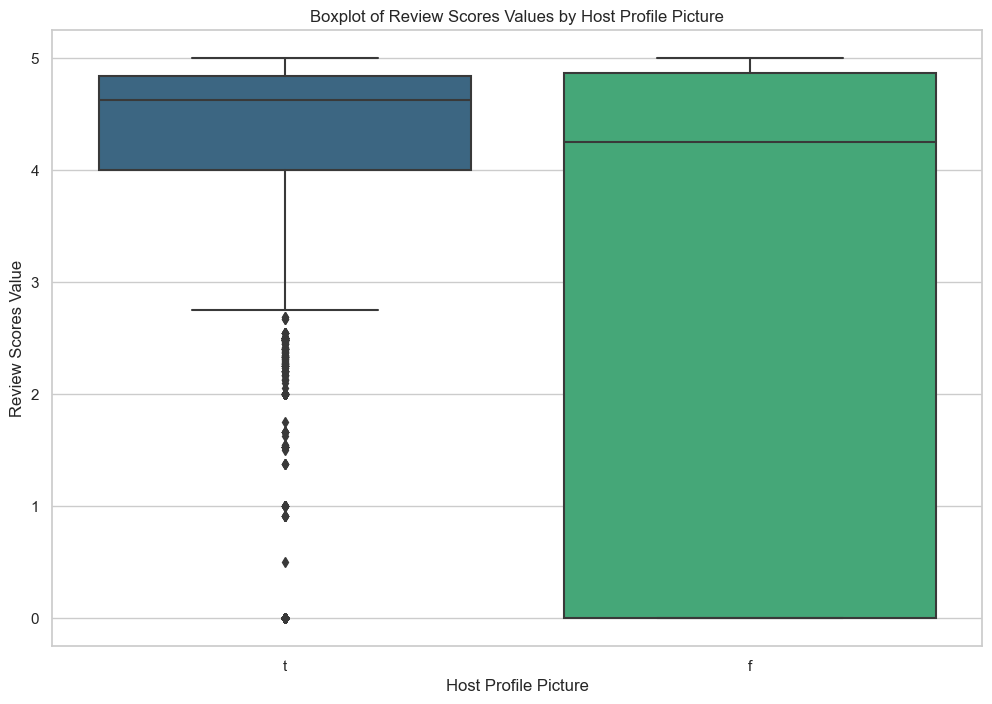

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x="host_has_profile_pic", y="review_scores_value", data=df, palette="viridis")


plt.xlabel("Host Profile Picture")
plt.ylabel("Review Scores Value")
plt.title("Boxplot of Review Scores Values by Host Profile Picture")


plt.show()

If the host includes a picture on the website, there is a higher likelihood that the Review Scores Value will be above 4. This makes sense as customers, when provided with a visual reference of the host, are more likely to have similar expectations when booking the place. Having a picture adds a visual element to the description, contributing to a more informed decision-making process for potential guests.

<Axes: title={'center': 'Country-wise Distribution of Satisfaction Percentages'}, xlabel='Countries', ylabel='Percentage'>

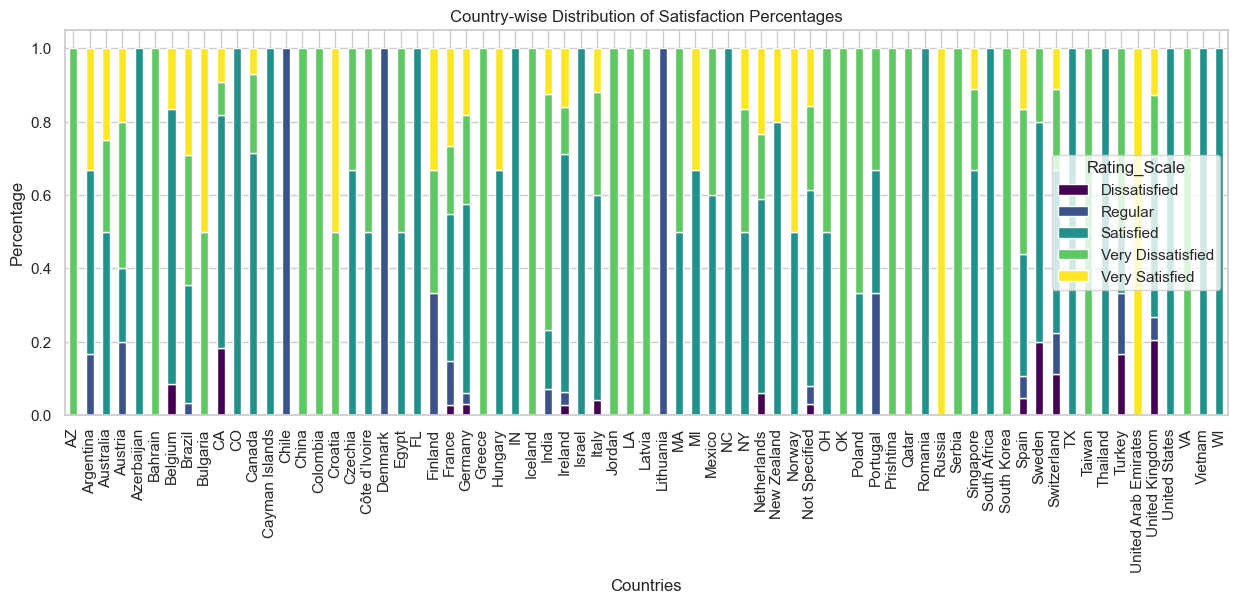

In [33]:
pd.crosstab(df['country'], df['Rating_Scale'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'viridis',
                                                                               figsize = (15, 5),
                                                                               title = 'Country-wise Distribution of Satisfaction Percentages',
                                                                               xlabel = 'Countries',
                                                                               ylabel = 'Percentage')


In this bar graphical representation, we observe various countries that offer accommodations through Airbnb. Some of these countries, such as AZ, Bulgaria, China, Colombia, and others, show a complete prevalence of 'Very Dissatisfied' ratings. Conversely, countries like Russia and the United Arab Emirates exhibit a predominance of 'Very Satisfied' ratings. However, it's essential to note that these extreme ratings may not be entirely reliable, as they are based on either one or fewer than five accommodations. 
Taking a holistic perspective, countries such as Argentina, Canadathe , Cayman Islands, Belgium, Norway, Michigan, New York, and Singapore demonstrate some of the highest satisfaction percentages. On the contrary, India, Massachusetts, Poland, and Spain exhibit some of the lowest satisfaction percentages. It's crucial to interpret these findings considering the overall number of accommodations taken into account for each country.

In [34]:
df.to_csv('airbnb_listings_modified.csv', index=False)